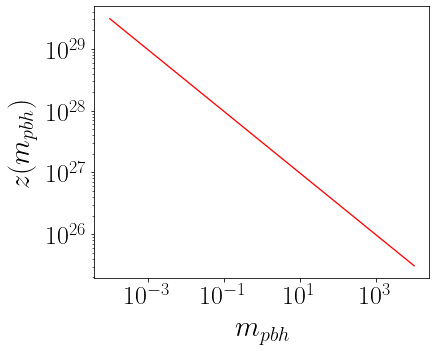

In [7]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 



plt.figure(figsize = (6, 5))
plt.loglog(m_1 , z_pbh(m_1, γ=1), 'r')
plt.xlabel('$m_{pbh}$', fontsize = 29, labelpad = 10) 
plt.ylabel('$z(m_{pbh})$', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.show()

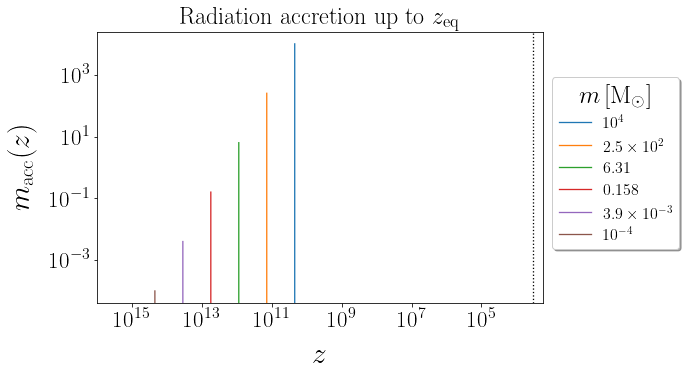

In [8]:
#Accretion of radiation around the PBH in radiation domination 
# as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v<< c_s


def m_racc(m, z):
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * ρ_c0 * G))**(1/2))
    def integral(z):
        y = (1 + z)
        a = Ω_r0
        b = Ω_m0
        first_term = np.sqrt((y**3) * (a *y + b))/(24 * (a**(7/2)) * (y**(3/2)))
        second_term = np.sqrt(a * y) * (8 * a**2 * y**2 - 10 * a * b * y + 15 * b**2)
        third_term = (15 * b**(5/2) * np.arcsinh(np.sqrt(a * y/b))) / np.sqrt( (a* y/b) + 1)
        return first_term * (second_term - third_term) 
    
    return 1/(α *  ρ_r0  * (integral(z) - integral(z_i))   + 1/m )


fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m,  γ=1)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, m_racc(m, z)/M_solar , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z) $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_eq)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

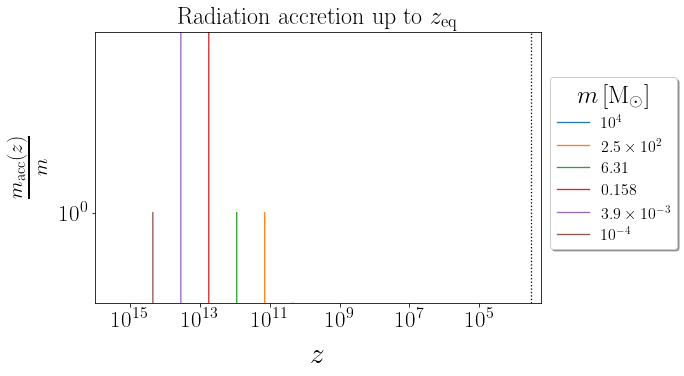

In [6]:
fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m,  γ=1)
    #print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, (m_racc(m, z))/m , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{m_\mathrm{acc}(z)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_eq)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

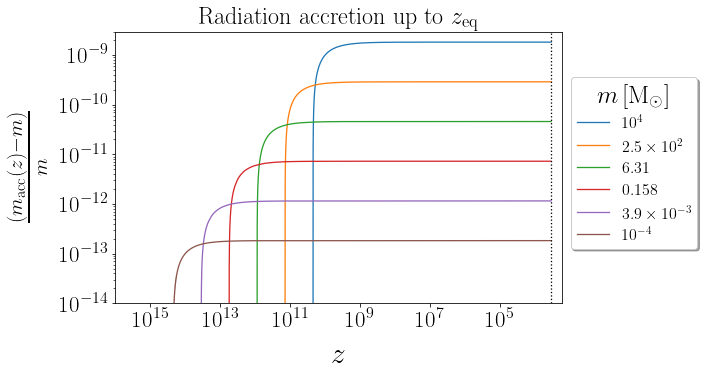

In [15]:
fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m,  γ=1)
    #print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, (m_racc(m, z)-m)/m , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-14, 3e-9)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('raccΔ.pdf', bbox_inches = 'tight')
plt.show()

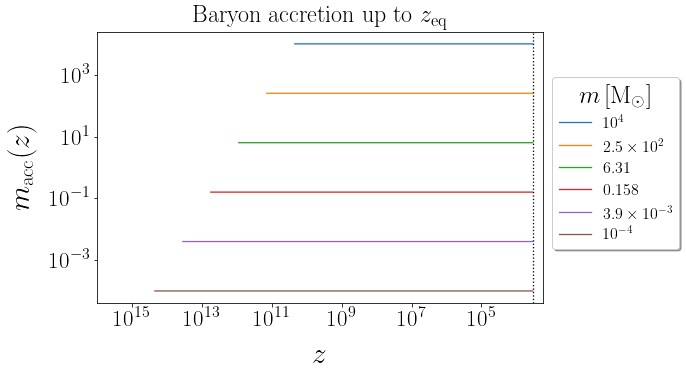

In [8]:
### Accretion of radiation around the PBH in radiation domination 
# as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v<< c_s


def m_bacc(m, z):
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * ρ_c0 * G))**(1/2))
    y = (1 + z)
    y_i = (1 + z_i)
    upper_limit =  np.log(Ω_m0 + Ω_r0 * y)/(Ω_r0)
    lower_limit =  np.log(Ω_m0 + Ω_r0 * y_i)/(Ω_r0)
    first_term  = α *  ρ_m0  * (upper_limit - lower_limit) * η_acc
    second_term = 1/m
    return (1/(first_term + second_term))


fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m,  γ=1)
    #print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, m_bacc(m, z)/M_solar , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z)$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_eq)
plt.title('Baryon accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

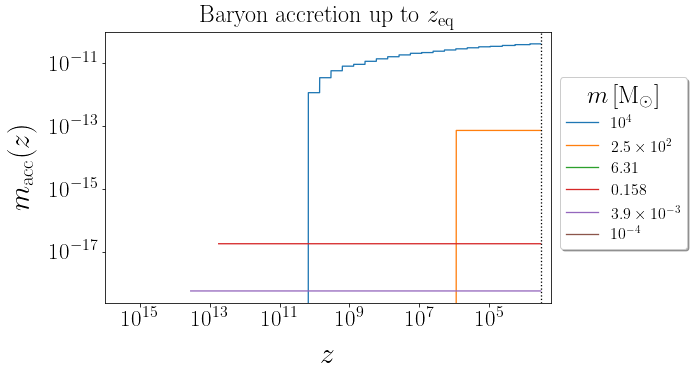

In [9]:
fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m,  γ=1)
    #print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, (m_bacc(m, z)-m)/M_solar , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z)$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_eq)
plt.title('Baryon accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

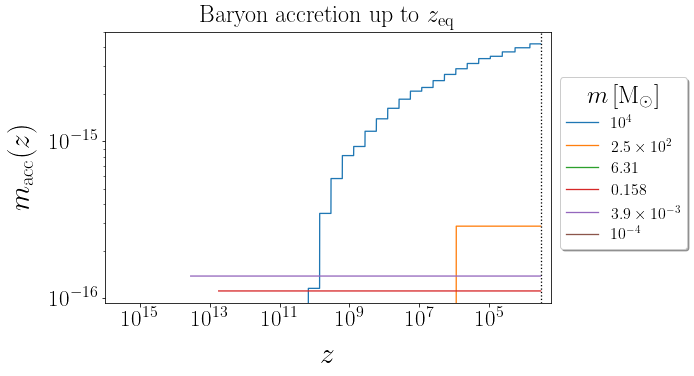

In [10]:
fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m,  γ=1)
    #print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, (m_bacc(m, z)-m)/m , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z)$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_eq)
plt.title('Baryon accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

In [3]:
np.sqrt(2) * np.sqrt(3)

2.4494897427831783

In [4]:
np.sqrt(6)

2.449489742783178